In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

2023-04-01 14:38:17.730488: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
input_data = "data/input_1/data.csv"
df       = pd.read_csv(input_data, header=None)

In [4]:
df = np.loadtxt(input_data,
                 delimiter=",", dtype=str)

# PCA

In [5]:
scaler  = StandardScaler()
scale_x = scaler.fit_transform(df)

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scale_x)

In [7]:
x=principalComponents[:, 0]
y=principalComponents[:, 1]

In [8]:
round(np.std(x), 2)

1.97

In [9]:
round(np.std(y), 2)

1.0

(-5.136946693606039,
 3.3896326317349588,
 -2.954305333635491,
 2.8679966947855062)

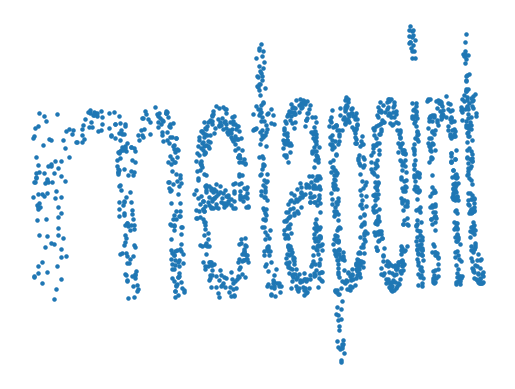

In [10]:
plt.scatter(-x, -y, s=5)
plt.axis(False)

# Task 3

In [11]:
train_data= "data/input_3/train_data.csv"
test_data = "data/input_3/test_data.csv"

train_data = pd.read_csv(train_data)
test_data  = pd.read_csv(test_data)

In [12]:
train_data

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT
0,REDACTED,high,0.585,4.347,66.812,C,-0.659,-0.527,3.749
1,beam,low,0.687,2.412,-17.044,C,0.508,-0.371,-1.062
2,REDACTED,low,0.888,2.979,40.918,C,0.600,1.412,2.265
3,auto,low,0.114,0.754,-43.308,C,-0.760,-0.109,1.847
4,burst,high,0.318,3.955,37.752,C,-0.751,0.492,1.821
...,...,...,...,...,...,...,...,...,...
995,auto,low,0.350,4.257,274.581,K,0.991,-0.335,2.466
996,beam,low,0.644,1.128,-27.707,C,-0.529,0.034,-1.834
997,burst,low,0.887,1.418,201.560,?,0.729,-0.503,-0.188
998,REDACTED,low,0.323,0.291,-17.162,C,-0.120,0.524,0.081


In [13]:
train_data=train_data.dropna()

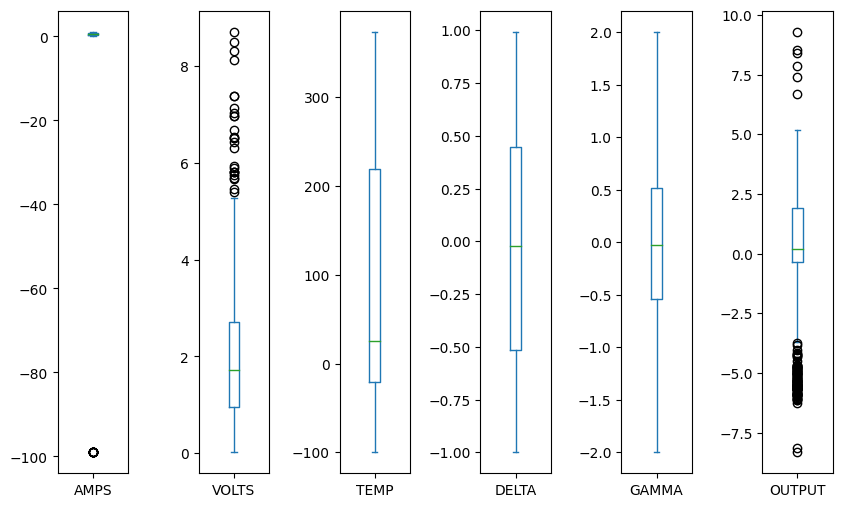

In [14]:
no_text=train_data.plot(kind='box', figsize=(10, 6), subplots=True) #AMPS APPEARS TO HAVE OULIERS
# increase spacing between subplots
plt.subplots_adjust(wspace=1) 

In [15]:
train_data = train_data[train_data['AMPS'] >= 0]

In [16]:
train_data

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT
0,REDACTED,high,0.585,4.347,66.812,C,-0.659,-0.527,3.749
1,beam,low,0.687,2.412,-17.044,C,0.508,-0.371,-1.062
2,REDACTED,low,0.888,2.979,40.918,C,0.600,1.412,2.265
3,auto,low,0.114,0.754,-43.308,C,-0.760,-0.109,1.847
4,burst,high,0.318,3.955,37.752,C,-0.751,0.492,1.821
...,...,...,...,...,...,...,...,...,...
995,auto,low,0.350,4.257,274.581,K,0.991,-0.335,2.466
996,beam,low,0.644,1.128,-27.707,C,-0.529,0.034,-1.834
997,burst,low,0.887,1.418,201.560,?,0.729,-0.503,-0.188
998,REDACTED,low,0.323,0.291,-17.162,C,-0.120,0.524,0.081


In [17]:
df=train_data.copy()

In [18]:
# change 'UNIT' value to 'C' or 'K' based on 'TEMP'
df.loc[(df['UNIT'] == '?') & (df['TEMP'] <= 100), 'UNIT'] = 'C'
df.loc[(df['UNIT'] == '?') & (df['TEMP'] < 0), 'UNIT'] = 'K'

# ? > 100 - k
# ? <= 0   - C

In [19]:
df

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT
0,REDACTED,high,0.585,4.347,66.812,C,-0.659,-0.527,3.749
1,beam,low,0.687,2.412,-17.044,C,0.508,-0.371,-1.062
2,REDACTED,low,0.888,2.979,40.918,C,0.600,1.412,2.265
3,auto,low,0.114,0.754,-43.308,C,-0.760,-0.109,1.847
4,burst,high,0.318,3.955,37.752,C,-0.751,0.492,1.821
...,...,...,...,...,...,...,...,...,...
995,auto,low,0.350,4.257,274.581,K,0.991,-0.335,2.466
996,beam,low,0.644,1.128,-27.707,C,-0.529,0.034,-1.834
997,burst,low,0.887,1.418,201.560,?,0.729,-0.503,-0.188
998,REDACTED,low,0.323,0.291,-17.162,C,-0.120,0.524,0.081


In [20]:
df.loc[df['UNIT'] == 'K', 'TEMP'] = df['TEMP'] - 273.15

In [21]:
round(np.mean(df.TEMP), 2)

12.51

In [22]:
round(np.std(df.TEMP), 0)

76.0

In [23]:
df_k = df.loc[df['UNIT'] == 'K'].copy() # make a copy to avoid modifying the original dataframe

In [24]:
round(np.mean(df_k.TEMP), 2)

-0.69

In [25]:
round(np.std(df_k.TEMP), 0)

48.0

# Regression Task

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [27]:
test_data = "data/input_6/encrypted/test_data.csv"

test_data  = pd.read_csv(test_data)

In [28]:
df

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT
0,REDACTED,high,0.585,4.347,66.812,C,-0.659,-0.527,3.749
1,beam,low,0.687,2.412,-17.044,C,0.508,-0.371,-1.062
2,REDACTED,low,0.888,2.979,40.918,C,0.600,1.412,2.265
3,auto,low,0.114,0.754,-43.308,C,-0.760,-0.109,1.847
4,burst,high,0.318,3.955,37.752,C,-0.751,0.492,1.821
...,...,...,...,...,...,...,...,...,...
995,auto,low,0.350,4.257,1.431,K,0.991,-0.335,2.466
996,beam,low,0.644,1.128,-27.707,C,-0.529,0.034,-1.834
997,burst,low,0.887,1.418,201.560,?,0.729,-0.503,-0.188
998,REDACTED,low,0.323,0.291,-17.162,C,-0.120,0.524,0.081


In [29]:
# separate the dataset into X and y
y = df['OUTPUT'].values
X = df.drop('OUTPUT', axis=1)

In [30]:
# convert ordinal data into numbers
X['POWER'] = X['POWER'].replace({'high': 1, 'low': 0})

In [31]:
# encode the categorical column using one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_col = encoder.fit_transform(X[['MODE']])

df_enc = X.drop(['UNIT', 'MODE'], axis=1)

# combine the encoded column with the numerical columns
X = np.hstack([df_enc.values, encoded_col])

In [32]:
X_submit = test_data

In [33]:
X_submit['POWER'] = X_submit['POWER'].replace({'high': 1, 'low': 0})

# encode the categorical column using one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_col = encoder.fit_transform(X_submit[['MODE']])

df_enc = X_submit.drop(['UNIT', 'MODE'], axis=1)

# combine the encoded column with the numerical columns
X_submit = np.hstack([df_enc.values, encoded_col])

In [34]:
#validation for model comparisson
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=15)

#train and test sets (for neural nets)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.10, random_state=15)

In [44]:
params = {
    "n_estimators": 2000,
    "max_depth": 8,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_val, reg.predict(X_val))
print("The mean squared error (MSE) on validation set: {:.4f}".format(mse))

The mean squared error (MSE) on validation set: 0.6425


In [36]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='rmsprop', loss='mse')

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights = True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

2023-04-01 14:38:43.764630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000
39/39 [==============================] - 2s 9ms/step - loss: 42.8281 - val_loss: 6.5481
Epoch 2/1000
39/39 [==============================] - 0s 3ms/step - loss: 21.9195 - val_loss: 10.3959
Epoch 3/1000
39/39 [==============================] - 0s 3ms/step - loss: 21.3926 - val_loss: 15.3670
Epoch 4/1000
39/39 [==============================] - 0s 3ms/step - loss: 16.6345 - val_loss: 12.6738
Epoch 5/1000
39/39 [==============================] - 0s 3ms/step - loss: 16.0501 - val_loss: 5.0396
Epoch 6/1000
39/39 [==============================] - 0s 3ms/step - loss: 15.5702 - val_loss: 4.8718
Epoch 7/1000
39/39 [==============================] - 0s 3ms/step - loss: 12.5924 - val_loss: 7.5650
Epoch 8/1000
39/39 [==============================] - 0s 3ms/step - loss: 10.9092 - val_loss: 6.0744
Epoch 9/1000
39/39 [==============================] - 0s 3ms/step - loss: 13.1555 - val_loss: 5.5571
Epoch 10/1000
39/39 [==============================] - 0s 3ms/step - loss: 11.3881 - val

39/39 [==============================] - 0s 3ms/step - loss: 1.5150 - val_loss: 0.8120
Epoch 83/1000
39/39 [==============================] - 0s 3ms/step - loss: 1.3502 - val_loss: 0.6873
Epoch 84/1000
39/39 [==============================] - 0s 3ms/step - loss: 1.4541 - val_loss: 1.7238
Epoch 85/1000
39/39 [==============================] - 0s 2ms/step - loss: 1.3632 - val_loss: 1.3873
Epoch 86/1000
39/39 [==============================] - 0s 3ms/step - loss: 1.2664 - val_loss: 0.5887
Epoch 87/1000
39/39 [==============================] - 0s 3ms/step - loss: 1.3391 - val_loss: 0.8969
Epoch 88/1000
39/39 [==============================] - 0s 3ms/step - loss: 1.2907 - val_loss: 1.0514
Epoch 89/1000
39/39 [==============================] - 0s 3ms/step - loss: 1.3133 - val_loss: 1.6266
Epoch 90/1000
39/39 [==============================] - 0s 3ms/step - loss: 1.2941 - val_loss: 0.5877
Epoch 91/1000
39/39 [==============================] - 0s 3ms/step - loss: 1.2714 - val_loss: 0.6255
Epoc

39/39 [==============================] - 0s 3ms/step - loss: 0.6567 - val_loss: 0.3913
Epoch 163/1000
39/39 [==============================] - 0s 3ms/step - loss: 0.6229 - val_loss: 0.5509
Epoch 164/1000
39/39 [==============================] - 0s 3ms/step - loss: 0.6031 - val_loss: 0.4407
Epoch 165/1000
39/39 [==============================] - 0s 3ms/step - loss: 0.6817 - val_loss: 0.4229
Epoch 166/1000
39/39 [==============================] - 0s 3ms/step - loss: 0.6677 - val_loss: 0.3358
Epoch 167/1000
39/39 [==============================] - 0s 3ms/step - loss: 0.5584 - val_loss: 0.4773
Epoch 168/1000
39/39 [==============================] - 0s 4ms/step - loss: 0.5989 - val_loss: 0.6032
Epoch 169/1000
39/39 [==============================] - 0s 4ms/step - loss: 0.6669 - val_loss: 0.2898
Epoch 170/1000
39/39 [==============================] - 0s 3ms/step - loss: 0.5102 - val_loss: 0.3383
Epoch 171/1000
39/39 [==============================] - 0s 3ms/step - loss: 0.5923 - val_loss: 0.

(0.0, 8.0)

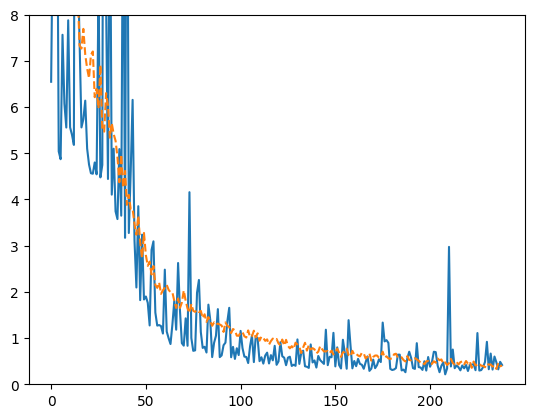

In [37]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'], ls='--')
plt.ylim(0, 8)

In [38]:
# Evaluate the model on the validation set
mse = model.evaluate(X_val, y_val)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

10/10 [==============================] - 0s 2ms/step - loss: 0.5366
The mean squared error (MSE) on test set: 0.5366


## MLP is the top performer in this scenario

In [39]:
output=model.predict(X_submit)

79/79 [==============================] - 0s 1ms/step


In [40]:
np.savetxt('predictions_7.txt', output, fmt='%.2f')

# TASK 6

In [45]:
test_data = "data/input_6/encrypted/test_data.csv"

test_data  = pd.read_csv(test_data)

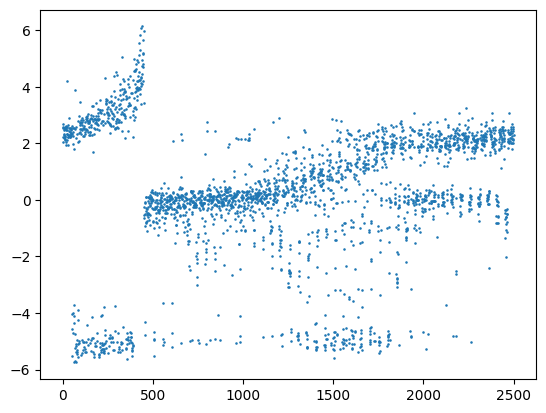

In [46]:
plt.scatter(np.linspace(1, len(output), len(output)), output, s=0.7)

(-0.5, 49.5, 49.5, -0.5)

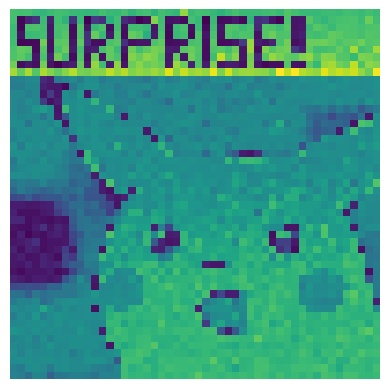

In [47]:
plt.imshow(output.reshape(50, 50))
plt.axis('off')

# OPTIMIZATION EXPERIMENTS - GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "n_estimators": 2000,
    "max_depth": 7,
    "min_samples_split": 10,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

gb = ensemble.GradientBoostingRegressor(**params)

In [ ]:
# define the hyperparameters to search over
params = {
    'n_estimators': [1000, 2000],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7, 10]
}

# create a GridSearchCV object
grid = GridSearchCV(gb, params, cv=5)

# fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

In [ ]:
# print the best hyperparameters and corresponding score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# KERAS

In [ ]:



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=12)

# Define the model architecture
model = Sequential()
#model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.12))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.14))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.12))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='rmsprop', loss='mse')

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=69, restore_best_weights = True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

In [ ]:
output=model.predict(X_submit)

In [ ]:
np.savetxt('predictions_7.txt', output, fmt='%.2f')

# AGRESSIVE EXPERIMENTS

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.18))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.18))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.12))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='rmsprop', loss='mse')

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=70)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))